<a href="https://colab.research.google.com/github/Bryan-Az/Neurobytes/blob/notebooks/mlops/notebooks/tracks_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of Track Related Data

## Authentication and Data Loading

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd

In [2]:

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
million_song_glink = 'https://drive.google.com/file/d/1EL4vYhO4A0Cgm8akBgAfDrWOGvtF6Xvo/view?usp=sharing'
million_song_name = 'million_songs.zip'

In [4]:
user_preferences_glink = 'https://drive.google.com/file/d/1qo5Ruz7Nu_YC6iBaX3V3IGYuubSwAeJy/view?usp=drive_link'
user_preferences_name = 'user_preferences.csv'

In [5]:
def get_link_content(link, name):
  file_id = link.split('/')[-2]
  downloaded = drive.CreateFile({'id': file_id})
  downloaded.GetContentFile(name)

In [6]:
get_link_content(million_song_glink, million_song_name)

In [7]:
get_link_content(user_preferences_glink, user_preferences_name)

In [8]:
million_songs = pd.read_csv(million_song_name)
user_preferences = pd.read_csv(user_preferences_name)

In [9]:
million_songs.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


# Connecting User Preferences to the Million Song Dataset and LastFM API
The user preferences dataset has a songID index which matches the index in the million song dataset, and also accesses new features from Last Fm such as:

- listeners
- playcount
- tags (genres)


In [10]:
user_preferences = user_preferences.drop(['level_0'], axis=1)

In [11]:
user_preferences.head()

,songID,artist,song,link,text,userID,listeners,playcount,tags
0,19632,Toto,You Are The Flower,/t/toto/you+are+the+flower_20139737.html,"You never lose a minute, if in it there is lov...",0,25307,87344,"AOR, rock, soft rock, 70s, pop rock"
1,19632,Toto,You Are The Flower,/t/toto/you+are+the+flower_20139737.html,"You never lose a minute, if in it there is lov...",0,25307,87344,"AOR, rock, soft rock, 70s, pop rock"
2,25284,Billie Holiday,I Only Have Eyes For You,/b/billie+holiday/i+only+have+eyes+for+you_200...,"My love must be a kind of blind love, \r\nI c...",0,60356,178625,"jazz, female vocal, vocal jazz, blues, female ..."
3,43594,Michael Bolton,Only A Woman Like You,/m/michael+bolton/only+a+woman+like+you_101792...,"It's beautiful, your honesty \r\nYou cry when...",0,4595,13266,"Ballad, romantic, soul, pop, cool"
4,50200,Rascal Flatts,The Day Before You,/r/rascal+flatts/the+day+before+you_10238985.html,I had all but given up \r\nOn finding the one...,0,22077,86012,"country, rock, contemporary country, seen live..."


In [12]:
user_preferences.shape

(7615, 9)

# User Preferences

We have user data for 10 synthetically generated users. It represents the user's preferences. It was created using by selection at random for each user the top n (random for each user, from 5-10) similar tracks to a randomly sampled song from a randomly sampled set of songs (songs_per_users is random for each user, between 50-100).

For example, the amount of songs in a user's preference library is calculated by multiplying the top_n value by the songs_per_users value.

## Sample User Preferences

In [23]:
random_user = user_preferences.sample(n=1)['userID'].values[0]
random_user_preferences = user_preferences[user_preferences['userID'] == random_user]

In [24]:
random_user_preferences

,songID,artist,song,link,text,userID,listeners,playcount,tags
2113,44397,The Monkees,Zor And Zam,/m/monkees/zor+and+zam_10182944.html,By Bill Chadwick and John Chadwick \r\nThe ki...,3,5284,21293,"rock, 1968, genre: psychedelic rock, genre: ps..."
2114,44397,The Monkees,Zor And Zam,/m/monkees/zor+and+zam_10182944.html,By Bill Chadwick and John Chadwick \r\nThe ki...,3,5284,21293,"rock, 1968, genre: psychedelic rock, genre: ps..."
2115,16877,Rainbow,Man On The Silver Mountain,/r/rainbow/man+on+the+silver+mountain_20113626...,"I'm a wheel, I'm a wheel \r\nI can roll, I ca...",3,282694,1515721,"hard rock, classic rock, rock, Rainbow, heavy ..."
2116,24846,Beautiful South,Don't Fear The Reaper,/b/beautiful+south/dont+fear+the+reaper_100269...,All our times have come \r\nHere but now they...,3,13927,45108,"cover, covers, Mellow, pop, great cover"
2117,10640,King Diamond,The Puppet Master,/k/king+diamond/the+puppet+master_20294667.html,Night time in Budapest \r\nSo many people are...,3,21814,101564,"heavy metal, horror metal, metal, Favorite Art..."
...,...,...,...,...,...,...,...,...,...
2968,50017,Ramones,I Love You,/r/ramones/i+love+you_20113831.html,When I look in your eyes I see words I can't d...,3,43083,150614,"punk rock, punk, cover, 90s, covers"
2969,41978,LL Cool J,The Breakthrough,/l/ll+cool+j/the+breakthrough_20081048.html,Knuckleheads spreadin' gossip all over town \...,3,6312,14407,"hip hop, test"
2970,57493,Young Jeezy,Talk To Em,/y/young+jeezy/talk+to+em_20376883.html,"Like the person needs his soul ""uh huh, jeah"" ...",3,12812,43358,"rap, Dirty South, southern rap"
2971,57513,Youngbloodz,Just A Dream,/y/youngbloodz/just+a+dream_20148851.html,It ain't a thang in this world that's gonna kn...,3,1980,3010,brain2brain


## User Preferences: Artists

<Axes: >

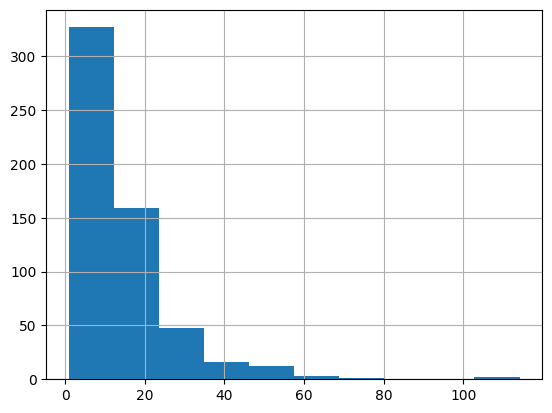

In [25]:
user_preferences.groupby(by=['artist']).count().mean(axis=1).hist()

In the above plot, we can see that a majority of artists make 0-20 appearances across all 10 users, on average. Some artists are outliers and appear up to 60 times!

<Axes: >

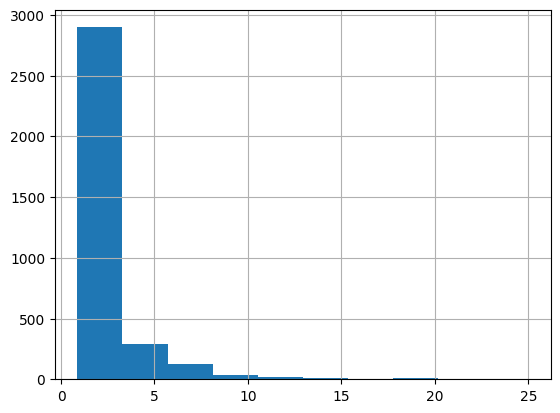

In [26]:
user_preferences.groupby(by='songID').count().mean(axis=1).hist()

## User Preferences: Top Artists

Songs are not as commonly distributed across users as artists. This makes sense as artist's tend to have multiple songs and albums, whereas songs are unique to a single artist, so it's less likely users have songs in common - but they may have artists in common.

**Our neural network model can be evaluated based on whether the song recommendations it makes perform well when using top-k categorical classification accuracy along the user preferences.**

In [27]:
# lets visualize the top 10 artist across all userIDs
for user in user_preferences.groupby(by='userID'):
  print('User: ', user[0])
  print('###############')
  display(user_preferences[user_preferences['userID'] == user[0]].groupby(by=['artist']).count().mean(axis=1).sort_values(ascending=False).head(10))
  print('###############')

User:  0
###############


artist
Diana Ross         11.000
Kenny Rogers        8.875
One Direction       8.750
Backstreet Boys     8.000
Glee                7.875
Demi Lovato         7.000
Michael Bolton      6.875
Chuck Berry         6.750
Keith Urban         6.000
Kirk Franklin       6.000
dtype: float64

###############
User:  1
###############


artist
Backstreet Boys       11.000
Luther Vandross        7.000
Kinks                  6.875
Diana Ross             6.875
Reba Mcentire          6.750
Linda Ronstadt         6.750
Natalie Imbruglia      6.000
The Beatles            6.000
Michael Bolton         5.875
Insane Clown Posse     5.875
dtype: float64

###############
User:  2
###############


artist
Luther Vandross    13.000
Mariah Carey       12.625
Backstreet Boys    10.750
One Direction       9.000
Michael Jackson     9.000
Travis              7.000
Donna Summer        7.000
Phil Collins        6.875
Z-Ro                6.750
The Monkees         6.750
dtype: float64

###############
User:  3
###############


artist
Luther Vandross    17.000
Modern Talking     10.000
Cheap Trick         9.750
Justin Bieber       9.750
Scorpions           9.000
The Temptations     8.875
Michael Bolton      8.000
The Beatles         7.875
Def Leppard         7.750
Backstreet Boys     7.000
dtype: float64

###############
User:  4
###############


artist
Backstreet Boys    10.875
Diana Ross         10.750
Mariah Carey       10.000
Foreigner           9.000
Michael Bolton      8.875
Cher                8.000
Luther Vandross     7.875
Reba Mcentire       7.750
The Beatles         7.000
Isley Brothers      7.000
dtype: float64

###############
User:  5
###############


artist
Scorpions          12.000
Luther Vandross    11.750
Backstreet Boys    11.500
The Beatles         9.875
Wiz Khalifa         8.500
Michael Jackson     8.000
George Michael      7.750
Linda Ronstadt      7.625
Rihanna             7.500
Foreigner           7.000
dtype: float64

###############
User:  6
###############


artist
Luther Vandross    13.000
Bonnie Raitt        9.875
Backstreet Boys     8.875
Whitesnake          6.000
Foreigner           6.000
Michael Jackson     5.875
Queen               5.000
Kenny Rogers        4.750
Cher                4.750
Glen Campbell       4.750
dtype: float64

###############
User:  7
###############


artist
Luther Vandross    15.000
Backstreet Boys    15.000
Reba Mcentire       9.375
Prince              9.000
Cher                9.000
Xscape              9.000
Natalie Cole        9.000
Michael Bolton      8.750
Michael Jackson     8.750
Alison Krauss       8.000
dtype: float64

###############
User:  8
###############


artist
Luther Vandross    13.500
Backstreet Boys    12.875
Diana Ross         11.375
R. Kelly            9.625
Reba Mcentire       8.750
Michael Jackson     8.500
Bonnie Raitt        8.000
Usher               7.875
The Monkees         7.875
Lionel Richie       7.875
dtype: float64

###############
User:  9
###############


artist
Diana Ross         11.625
Linda Ronstadt     11.375
Luther Vandross    11.000
Hillsong           10.875
Rihanna            10.750
Backstreet Boys     8.875
Chris Brown         8.875
Keith Urban         8.000
Glee                7.625
Jackson Browne      7.000
dtype: float64

###############
